In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [21]:
dt = pd.read_csv('val_data.csv')

In [13]:
dt.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.000000,1.0,t_0ecb0e5a-7ef9-41d0-b4a5-04227f26df91,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.052632,1.0,t_cfb7d0c1-6d2e-40d7-b88b-4257418e0e66,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.105263,1.0,t_7f13ebe6-7616-470a-a196-d7054eb16941,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.157895,1.0,t_4e830a5d-4bd2-4d99-a780-2ad244e5e185,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.210526,1.0,t_3976726e-f7bd-4bb1-b554-78f205cc297b,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [17]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128836 entries, 0 to 128835
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   session_id                                  128836 non-null  object 
 1   session_position                            128836 non-null  float64
 2   session_length                              128836 non-null  float64
 3   track_id_clean                              128836 non-null  object 
 4   skip_1                                      128836 non-null  int64  
 5   skip_2                                      128836 non-null  int64  
 6   skip_3                                      128836 non-null  int64  
 7   not_skipped                                 128836 non-null  int64  
 8   context_switch                              128836 non-null  int64  
 9   no_pause_before_play                        128836 non-null  int64  
 

In [18]:
dt[[c for c in dt.columns if dt[c].dtype != 'float64']].head()

,session_id,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,t_0ecb0e5a-7ef9-41d0-b4a5-04227f26df91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,t_cfb7d0c1-6d2e-40d7-b88b-4257418e0e66,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,t_7f13ebe6-7616-470a-a196-d7054eb16941,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,t_4e830a5d-4bd2-4d99-a780-2ad244e5e185,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,t_3976726e-f7bd-4bb1-b554-78f205cc297b,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


C:\Users\Alex\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


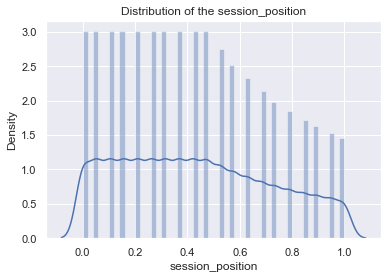

In [19]:
sns.distplot(dt.session_position)
plt.title("Distribution of the session_position");

In [34]:
dt['session_position'].value_counts()

0.000000    3749
0.842105    3749
0.947368    3749
0.368421    3749
0.473684    3749
0.210526    3749
0.578947    3749
0.631579    3749
0.421053    3749
0.684211    3749
1.000000    3749
0.052632    3749
0.105263    3749
0.315789    3749
0.736842    3749
0.894737    3749
0.263158    3749
0.157895    3749
0.789474    3749
0.526316    3749
Name: session_position, dtype: int64

In [35]:
dt['session_position'].value_counts() / dt['session_position'].count()

0.000000    0.05
0.842105    0.05
0.947368    0.05
0.368421    0.05
0.473684    0.05
0.210526    0.05
0.578947    0.05
0.631579    0.05
0.421053    0.05
0.684211    0.05
1.000000    0.05
0.052632    0.05
0.105263    0.05
0.315789    0.05
0.736842    0.05
0.894737    0.05
0.263158    0.05
0.157895    0.05
0.789474    0.05
0.526316    0.05
Name: session_position, dtype: float64

In [37]:
tf = dt.session_length.value_counts().sort_index()
tf / tf.sum()

1.0    1.0
Name: session_length, dtype: float64

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Alex\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


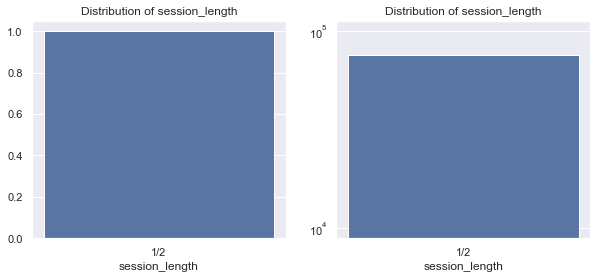

In [52]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(
    [f"{i}/2" for i in range(1,2)],
    tf.values / tf.sum()
)
plt.title("Distribution of session_length")
plt.xlabel("session_length")

plt.subplot(1,2,2)
sns.barplot(
    [f"{i}/2" for i in range(1,2)],
    tf.values
)
plt.title("Distribution of session_length")
plt.xlabel("session_length")
plt.yscale('log');

Text(0.5, 1.0, 'session_lengths')

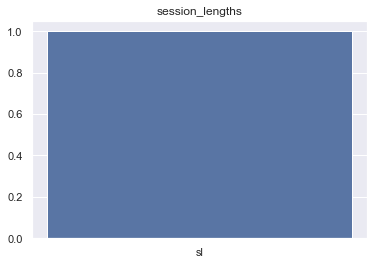

In [58]:
session_lengths = dt.session_length.value_counts().sort_index()
sns.barplot(
    x=[
        'sl'
    ],
    y=session_lengths.values/session_lengths.sum()
)
plt.title("session_lengths")


In [ ]:
sns.pairplot(dt)
plt.savefig(session_length)

C:\Users\Alex\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


NameError: name 'session_length' is not defined